### Erasmus student mobility (study exchanges and work placements in 2010-11)

#### 1. Dataset information
#### Erasmus stands for European Region Action Scheme for the Mobility of University Students
#### This dataset contains the statistical overview of Erasmus mobility for students (study exchanges and work placements) in 2010-11. Statistics are presented at country and European level for various criteria, e.g.: age, gender, grant, duration, special needs, subject area, level of study, sending and receiving country, etc.,
#### The [Dataset Source](https://data.europa.eu/data/datasets/erasmus-facts-figures-trends-2010-2011?locale=en) is [The official portal for European data](https://data.europa.eu/en)."
   

In [2031]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

- Home Institution (Db:HomeInstitution): Erasmus ID code of the Sending Institution of the student
- Country Code of Home Institution (Db:CountryCodeofHomeInstitution) : The country of Home Institution where a student studies / is registered
- Age (Dd:Age)
- Gender (Db: Gender)
- Nationality (Db: Nationality)
- Subject Area (Db: SubjectArea) The subject studied by the student at Home Institution. Numerical string of a maximum of 4 characters according to ISCED97 codes or Erasmus subject area codes (xx.x). 
- Years of HE Study Prior to Erasmus Study/Placement period (Db:YearsPrior) Number of (completed) years of higher education study prior to period abroad
- Host Institution (Db: HostInstitution): The institution at which the student spend its Erasmus period
- Country of Placement (Db: CountryOfWorkPlacement)
- Size of the Enterprise  (Db: EnterpriseSize)
- Type of Placement Sector (Db: TypeWorkSector) The field describes the type of the placement sector. Sector Code. String of 1 characters in the list of “NACE Sector Codes”
- Supplement for disability (Db: SEVSupplement) The total grant awarded for disability for a study period/placement. This grant must be reported entirety in this field
- Length of Placement in Months (Db: LengthPlacement)
- Number of ECTS Credits Placement (Db: ECTSCreditsWork)
- Learning carried out in the national language of Host country (Db: TaughtHostLang): Whether the student has carried out the training in the language of the Host Country
- Training Language (Db: LanguageTaught) The language in which the student has  undergone the training
- Linguistic Preparation of Student (Db: LingPreparation) Reports whether a student has attended a language course including EILC course in the Host country or other courses in the Home or Host country, which are specifically related to ERASMUS. It is not a general question about their schooling.  
- Study Grant (Db: StudyGrant) The amount of grant the student received for study period excluding disability supplement but including EILCs
- Placement Grant (Db: PlacementGrant) The amount of grant the student received for placement excluding disability supplement but including EILCs
- Previous participation in the ERASMUS programme (Db: PreviousParticipation) The field indicates whether the student has received an ERASMUS grant prior to this one and for which type of mobility. 
- Qualification received at the Host Country (Db: QualificationAtHost) The field will hold information on whether the student will get a double, joint degree or any other qualification at the Host Institution/ Placement or no.
















# 1. Read dataset and a glance of the head of data

In [2032]:
data=pd.read_csv("student_data_2010.csv",error_bad_lines=False,sep=";")
print(f'Shape of the data {data.shape}')
data.head()

Shape of the data (231408, 32)


,HOMEINSTITUTION,COUNTRYCODEOFHOMEINSTITUTION,AGE,GENDER,NATIONALITY,SUBJECTAREA,LEVELSTUDY,YEARSPRIOR,MOBILITYTYPE,HOSTINSTITUTION,...,ECTSCREDITSWORK,TOTALECTSCREDITS,SEVSUPPLEMENT,TAUGHTHOSTLANG,LANGUAGETAUGHT,LINGPREPARATION,STUDYGRANT,PLACEMENTGRANT,PREVIOUSPARTICIPATION,QUALIFICATIONATHOST
0,HU BUDAPES02,HU,25,M,HU,521,3,1,P,NaN,...,0,0,0,N,DE,NN,0.0,900.0,N,N
1,HU BUDAPES02,HU,28,M,HU,522,3,4,P,NaN,...,0,0,0,N,DE,NN,0.0,3600.0,N,N
2,HU BUDAPES02,HU,25,F,HU,581,2,5,P,NaN,...,0,0,0,N,EN,NN,0.0,1500.0,N,N
3,HU BUDAPES02,HU,23,M,SK,582,2,4,P,NaN,...,0,0,0,N,DE,NN,0.0,900.0,N,N
4,HU BUDAPES02,HU,24,F,HU,581,2,5,P,NaN,...,0,0,0,N,DE,NN,0.0,1800.0,N,N


# 2. Data cleaning and wrangling

In [2033]:
# Drop Nan values:
data.dropna(how="all",inplace=True)

In [2034]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231408 entries, 0 to 231407
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   HOMEINSTITUTION               231408 non-null  object 
 1   COUNTRYCODEOFHOMEINSTITUTION  231408 non-null  object 
 2   AGE                           231408 non-null  int64  
 3   GENDER                        231408 non-null  object 
 4   NATIONALITY                   231408 non-null  object 
 5   SUBJECTAREA                   231408 non-null  int64  
 6   LEVELSTUDY                    231408 non-null  object 
 7   YEARSPRIOR                    231408 non-null  int64  
 8   MOBILITYTYPE                  231408 non-null  object 
 9   HOSTINSTITUTION               190499 non-null  object 
 10  COUNTRYCODEOFHOSTINSTITUTION  190499 non-null  object 
 11  WORKPLACEMENT                 40964 non-null   object 
 12  COUNTRYOFWORKPLACEMENT        40964 non-null

#### Comment: From the Dataset info, there are 2 kinds of Erasmus exchange: work placement and study.

In [2035]:
student_with_workplacement=data[data.WORKPLACEMENT.notnull()]
df = student_with_workplacement

In [2036]:
len(df)

40964

In [2037]:
student_without_workplacement=data[~data.WORKPLACEMENT.notnull()]

In [2038]:
len(student_without_workplacement)

190444

In [2039]:
# Columns in student with workplacement dataset

df.columns

Index(['HOMEINSTITUTION', 'COUNTRYCODEOFHOMEINSTITUTION', 'AGE', 'GENDER',
       'NATIONALITY', 'SUBJECTAREA', 'LEVELSTUDY', 'YEARSPRIOR',
       'MOBILITYTYPE', 'HOSTINSTITUTION', 'COUNTRYCODEOFHOSTINSTITUTION',
       'WORKPLACEMENT', 'COUNTRYOFWORKPLACEMENT', 'ENTERPRISESIZE',
       'TYPEWORKSECTOR', 'LENGTHSTUDYPERIOD', 'LENGTHPLACEMENT',
       'SHORTDURATION', 'STUDYSTARTDATE', 'PLACEMENTSTARTDATE',
       'CONSORTIUMAGREEMENTNUMBER', 'ECTSCREDITSSTUDY', 'ECTSCREDITSWORK',
       'TOTALECTSCREDITS', 'SEVSUPPLEMENT', 'TAUGHTHOSTLANG', 'LANGUAGETAUGHT',
       'LINGPREPARATION', 'STUDYGRANT', 'PLACEMENTGRANT',
       'PREVIOUSPARTICIPATION', 'QUALIFICATIONATHOST'],
      dtype='object')

In [2040]:
binary_cols  = ['GENDER', 'MOBILITYTYPE', 'TAUGHTHOSTLANG']
ordinal_cols = ['ENTERPRISESIZE']
nominal_cols = ['PREVIOUSPARTICIPATION', 'QUALIFICATIONATHOST', 'SUBJECTAREA', 'NATIONALITY', 'LEVELSTUDY', 
                'COUNTRYOFWORKPLACEMENT', 'TYPEWORKSECTOR', 'LINGPREPARATION', 'LANGUAGETAUGHT']
numeric_cols = ['AGE', 'YEARSPRIOR', 'LENGTHPLACEMENT', 'ECTSCREDITSWORK']

# 3. Analyzing Dataset of workplacement group
Placement Enterprise
Db: WorkPlacement
- The name of the company/organisation at which the student undertook a  placement
(in latin characters).

    + C19.1 If " Type of mobility " = 'P', then "Placement Enterprise" cannot be empty
    + C19.2 If " Type of mobility " is not P, then "Placement Enterprise" must be empty
    + C19.2 Length ≤ 255


## 3.1 Preview

In [2041]:
# Shape of this subdataset:

print(f'Shape of workplacement Erasmus student data: {df.shape}')

Shape of workplacement Erasmus student data: (40964, 32)


In [2042]:
# Dataset description:

df.describe()

,AGE,SUBJECTAREA,YEARSPRIOR,LENGTHSTUDYPERIOD,LENGTHPLACEMENT,ECTSCREDITSSTUDY,ECTSCREDITSWORK,TOTALECTSCREDITS,SEVSUPPLEMENT,STUDYGRANT,PLACEMENTGRANT
count,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000
mean,22.764134,321.356362,2.666951,0.012340,4.334342,0.060175,14.619398,14.679572,0.938238,4.667954,1586.466603
std,3.297802,242.620397,1.429505,0.351672,2.028988,1.896413,15.762616,15.820776,58.143035,133.016147,840.113655
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,64.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1034.090000
50%,22.000000,313.000000,2.000000,0.000000,3.500000,0.000000,11.000000,11.000000,0.000000,0.000000,1400.000000
75%,24.000000,520.000000,4.000000,0.000000,5.000000,0.000000,26.000000,26.000000,0.000000,0.000000,1950.000000
max,68.000000,869.000000,16.000000,12.000000,12.000000,90.000000,90.000000,90.000000,8708.000000,4536.000000,9600.000000


#### Note:

- Average age of student is around 22 y.o, with a max of 68 y.o
- Average length of Placement is about 4 months, with a max of 12 months
- On average students earn 15 credits, with a max of 90 credits
- The average amount of placement grant is 1586 euros, with a max of 9600 euros for the whole exchange period

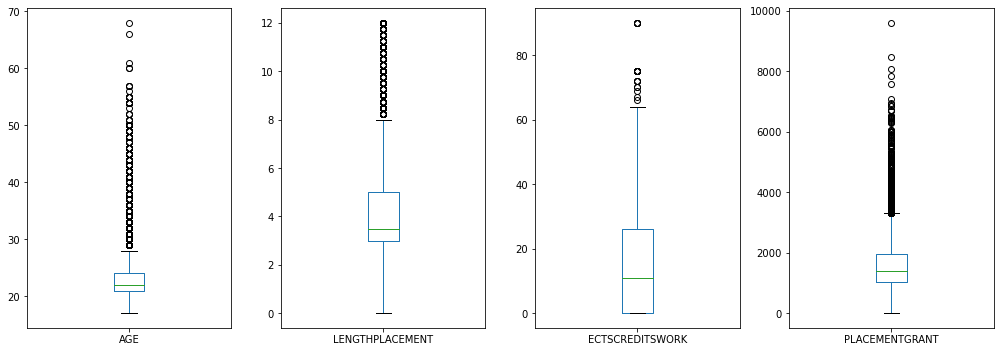

In [2043]:
# use boxplot to describe data

%matplotlib inline
fig,ax=plt.subplots(1,4,figsize=(14,5))
list1 = ['AGE','LENGTHPLACEMENT','ECTSCREDITSWORK','PLACEMENTGRANT']

for i in range(len(list1)):
    df[list1[i]].plot.box(ax = ax[i])

fig.tight_layout()
plt.show()

## 3.2 Drop irrelevant columns 

In [2044]:
df.drop(columns=["COUNTRYCODEOFHOSTINSTITUTION","STUDYSTARTDATE","ECTSCREDITSSTUDY", "LENGTHSTUDYPERIOD"], axis=1,inplace=True)

In [2045]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40964 entries, 0 to 231407
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HOMEINSTITUTION               40964 non-null  object 
 1   COUNTRYCODEOFHOMEINSTITUTION  40964 non-null  object 
 2   AGE                           40964 non-null  int64  
 3   GENDER                        40964 non-null  object 
 4   NATIONALITY                   40964 non-null  object 
 5   SUBJECTAREA                   40964 non-null  int64  
 6   LEVELSTUDY                    40964 non-null  object 
 7   YEARSPRIOR                    40964 non-null  int64  
 8   MOBILITYTYPE                  40964 non-null  object 
 9   HOSTINSTITUTION               55 non-null     object 
 10  WORKPLACEMENT                 40964 non-null  object 
 11  COUNTRYOFWORKPLACEMENT        40964 non-null  object 
 12  ENTERPRISESIZE                40964 non-null  object 
 13  

## 3.3 Drop duplicated columns

In [2046]:
# Check for duplication

df.duplicated().sum()

1272

In [2047]:
# filter duplication

df=df[~df.duplicated()]

In [2048]:
# length of new data

len(df)

39692

In [2049]:
# check for correlation

df.corr()

,AGE,SUBJECTAREA,YEARSPRIOR,LENGTHPLACEMENT,ECTSCREDITSWORK,TOTALECTSCREDITS,SEVSUPPLEMENT,STUDYGRANT,PLACEMENTGRANT
AGE,1.000000,0.097224,0.306283,0.007623,-0.101139,-0.102050,0.003963,-0.012188,0.019071
SUBJECTAREA,0.097224,1.000000,0.046106,-0.028010,0.022705,0.020834,-0.003557,-0.012000,-0.039471
YEARSPRIOR,0.306283,0.046106,1.000000,0.092399,-0.080503,-0.082086,0.000611,-0.017329,0.080890
LENGTHPLACEMENT,0.007623,-0.028010,0.092399,1.000000,0.417290,0.407597,0.004753,-0.075458,0.800821
ECTSCREDITSWORK,-0.101139,0.022705,-0.080503,0.417290,1.000000,0.992791,0.003001,-0.032735,0.257351
TOTALECTSCREDITS,-0.102050,0.020834,-0.082086,0.407597,0.992791,1.000000,0.002928,0.076903,0.249201
SEVSUPPLEMENT,0.003963,-0.003557,0.000611,0.004753,0.003001,0.002928,1.000000,-0.000567,0.008594
STUDYGRANT,-0.012188,-0.012000,-0.017329,-0.075458,-0.032735,0.076903,-0.000567,1.000000,-0.066613
PLACEMENTGRANT,0.019071,-0.039471,0.080890,0.800821,0.257351,0.249201,0.008594,-0.066613,1.000000


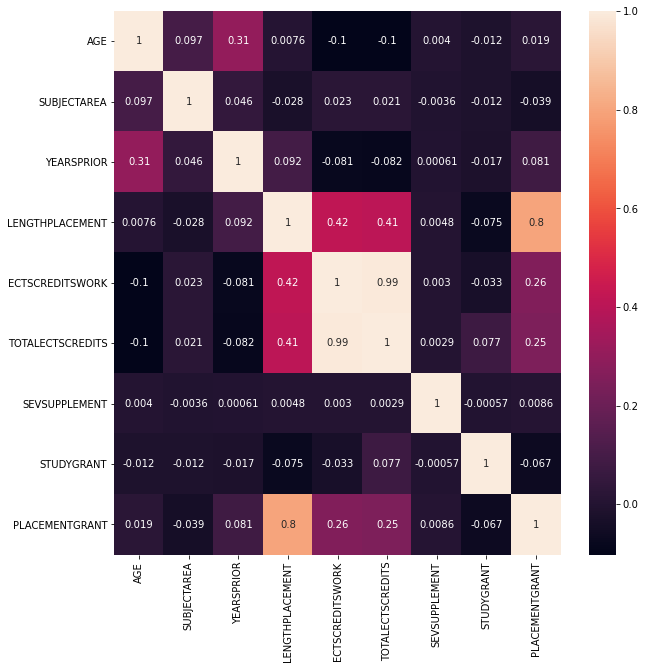

In [2050]:
# plotting heatmap to show the correlation

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

- Placement grant has a strong positive correlation with the length of work placement and a weak positive correlation with ECTS credit earned from work placement. 
- ECTS Credits earned from work placement have a weak correlation with length of placement.
- Years of HE studey prior to Erasmus placement have a weak positive correlation with age

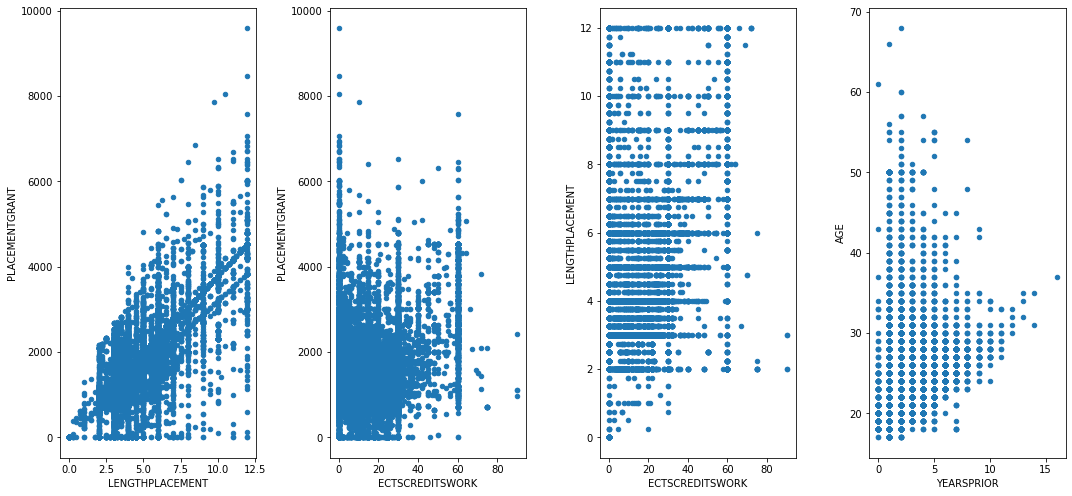

In [2051]:
# scattering plot between carat vs price, depth vs price, table vs price
%matplotlib inline
fig,ax = plt.subplots(1, 4, figsize=(15,7))

df.plot.scatter('LENGTHPLACEMENT','PLACEMENTGRANT',ax=ax[0])
df.plot.scatter('ECTSCREDITSWORK','PLACEMENTGRANT',ax=ax[1])
df.plot.scatter('ECTSCREDITSWORK','LENGTHPLACEMENT',ax=ax[2])
df.plot.scatter('YEARSPRIOR','AGE',ax=ax[3])

fig.tight_layout()
plt.show()

## 3.4 Analysing the connection between Gender and Placement grant

In [2052]:
# Analysing the gender data

gender=pd.DataFrame(df.GENDER.value_counts())
gender.reset_index()
gender.rename(columns={"index": "Female/Male", "GENDER": "Number of student"},inplace=True)

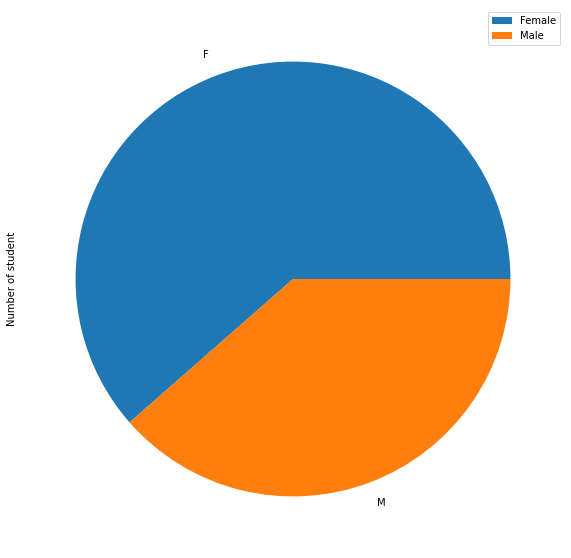

In [2053]:
%matplotlib inline

plt.rcParams['font.size'] = '10'
gender.plot.pie(y='Number of student', figsize=(10, 10)).legend(["Female","Male"])
plt.show()

In [2054]:
# Analysing the relationship between gender and placement grant
# Filter the data of gender and placement grant

gender_grant=df[["GENDER","PLACEMENTGRANT"]]
gender_grant

,GENDER,PLACEMENTGRANT
0,M,900.00
1,M,3600.00
2,F,1500.00
3,M,900.00
4,F,1800.00
...,...,...
231401,F,0.00
231403,M,0.00
231404,M,0.00
231405,M,1101.48


In [2055]:
# Aggregate the data

gender_grant_df=pd.pivot_table(gender_grant, values='PLACEMENTGRANT', index=['GENDER'],  aggfunc=np.average)
gender_grant_df.reset_index()

,GENDER,PLACEMENTGRANT
0,F,1582.060245
1,M,1600.370493


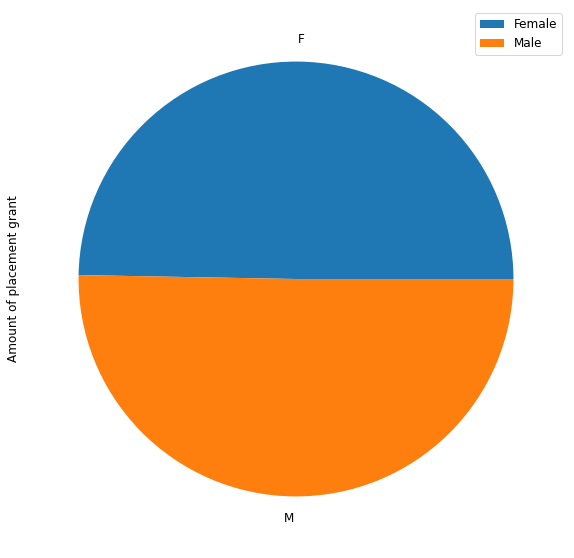

In [2136]:
# Plotting the data
%matplotlib inline

plt.rcParams['font.size'] = '12'
gender_grant_df.rename(columns={"GENDER": "Gender", "PLACEMENTGRANT": "Amount of placement grant"},inplace=True)
gender_grant_df.plot.pie(y='Amount of placement grant', figsize=(10, 10)).legend(["Female","Male"])
plt.show()

#### Conclusion: Although female students accounted for the greater percentage of participants, they received a bit lower placement grant compared with that of the couterpart.

### Apply statistics to compare the average placement grant between 2 genders

Perform a t-test to examine a hypothesis that says: the average placement grant is different between 2 genders, with a 95% confidence level.

In [2057]:
A = df[df["GENDER"]=='F']["PLACEMENTGRANT"]
B = df[df["GENDER"]=='M']["PLACEMENTGRANT"]

alpha=0.05

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='two-sided')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 0.035001449079720214
We reject the null hypothesis


## 3.5 Analysing the connection between Nationality and Placement grant

###### Db: Nationality
- Nationality of student
- String of 2 characters in the set “ISO Country Codes” 

In [2058]:
df.NATIONALITY.value_counts(normalize = True).sort_values(ascending = False)

FR    0.145949
DE    0.135947
ES    0.112264
UK    0.092311
PL    0.064018
IT    0.057115
NL    0.054545
TR    0.028469
BE    0.027739
RO    0.027210
FI    0.025950
XX    0.022196
PT    0.021944
HU    0.021390
LT    0.020609
CZ    0.020281
AT    0.020130
IE    0.014713
LV    0.013857
GR    0.013832
SK    0.011967
BG    0.011614
DK    0.010934
SE    0.007130
SI    0.006727
EE    0.005215
NO    0.003250
CY    0.001386
IS    0.000731
LU    0.000453
LI    0.000126
Name: NATIONALITY, dtype: float64

- From the dataset, we can see that students from France, Germany, Spain, UK, Poland, Italia made up the majority of exchange student, but is it correlated with the amount of placement they received?

In [2059]:
# Filter data of nationality and placement grant

nationality_grant=df[["NATIONALITY","PLACEMENTGRANT"]]
nationality_grant

,NATIONALITY,PLACEMENTGRANT
0,HU,900.00
1,HU,3600.00
2,HU,1500.00
3,SK,900.00
4,HU,1800.00
...,...,...
231401,LT,0.00
231403,LT,0.00
231404,LT,0.00
231405,LT,1101.48


In [2060]:
# Aggregate the data based on nationality to calculate the mean amount of placement grant

nationality_grant_agg=pd.pivot_table(nationality_grant, values='PLACEMENTGRANT', index=['NATIONALITY'],  
               aggfunc=np.mean).sort_values(by="PLACEMENTGRANT",ascending=False)[:10]
nationality_grant_agg

,PLACEMENTGRANT
NATIONALITY,
CY,2709.344909
UK,2699.632522
GR,2586.552732
IE,2183.634949
IS,1976.034483
RO,1972.615315
TR,1960.536274
BG,1941.630477
SE,1900.758304


In [2061]:
# create a dictionary for the top ten country

dict_={"CY":"Cyprus", "UK": "United Kingdom", "GR":"Greece", "IE":"Ireland", "IS":"Iceland", "RO":"Romania", "TR":"Turkey","BG":" Bulgaria","SE":"Sweden","IT":"Italy"}

# map the dictionary of countries with the aggregated data

nationality_grant_agg.index
s = nationality_grant_agg.index.to_series()
nationality_grant_agg.index = np.array(s.map(dict_).fillna(s),ndmin =1)
nationality_grant_agg.reset_index(inplace=True)
nationality_grant_agg

,index,PLACEMENTGRANT
0,Cyprus,2709.344909
1,United Kingdom,2699.632522
2,Greece,2586.552732
3,Ireland,2183.634949
4,Iceland,1976.034483
5,Romania,1972.615315
6,Turkey,1960.536274
7,Bulgaria,1941.630477
8,Sweden,1900.758304
9,Italy,1892.834760


#### Conclusion: A glance from the table of top 10 placement grants shows that there is a difference between grants of diffirent nationalities. People from Cyprus the biggest grant of 2709 Euros on average while on average Italian students received 1892 Euros. The difference in grant between those two nationalities is 1.5 times

## 3.6 Analysing the connection between Subject area and Placement grant
 

In [2062]:
# Filter unique value of subject area and create a data frame

df.SUBJECTAREA.unique()
subject_area=pd.DataFrame(df.SUBJECTAREA.value_counts())

In [2063]:
# Top 10 subject area

top_10=subject_area[:10]
top_10

,SUBJECTAREA
64,5355
222,3851
340,1904
34,1773
345,1254
314,1216
421,1040
721,941
214,863
52,857


In [2064]:
# create a dictionary of top 10 subject

dict_={64:"Veterinary",222:"Foreign languages",340:"Business and administration (broad)",
                34:"Business and administration",345:"Management and administration",
                314:"Economics",421:"Biology and biochemistry",721:"Medicine",
                214:"Design",52:"Engineering and engineering trades"}

# map the dictionary of subject and data

s = top_10.index.to_series()
top_10.index = np.array(s.map(dict_).fillna(s),ndmin =1)
top_10.reset_index(inplace=True)
top_10.rename(columns={"index": "Subject area", "SUBJECTAREA": "Number of student"},inplace=True)
top_10

,Subject area,Number of student
0,Veterinary,5355
1,Foreign languages,3851
2,Business and administration (broad),1904
3,Business and administration,1773
4,Management and administration,1254
5,Economics,1216
6,Biology and biochemistry,1040
7,Medicine,941
8,Design,863
9,Engineering and engineering trades,857


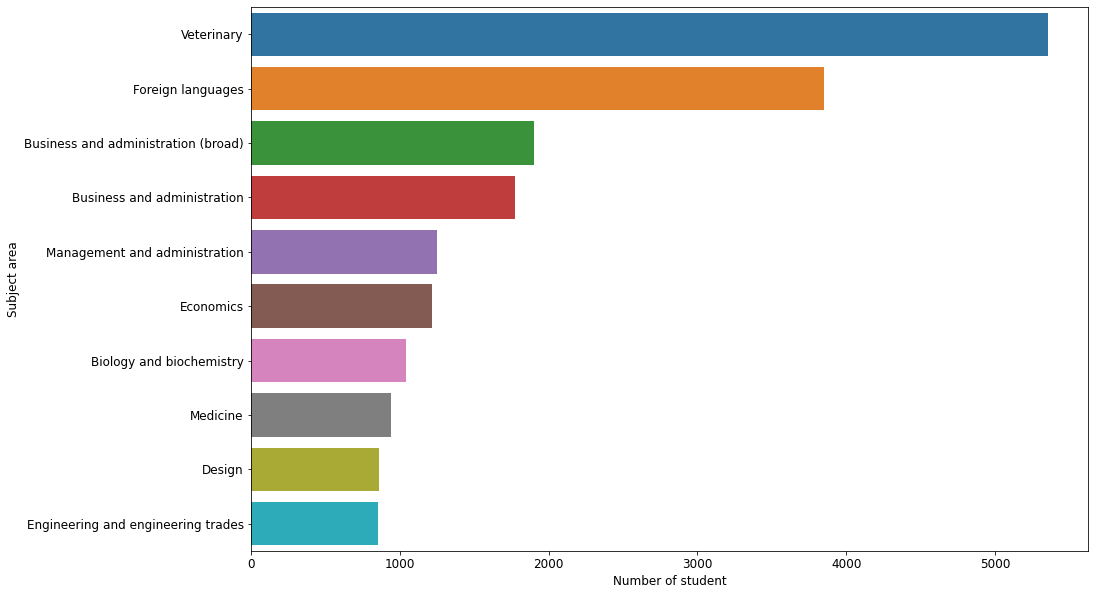

In [2065]:
# Plotting top 10 subject
%matplotlib inline

plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = '12'
sns.barplot(y=top_10['Subject area'],x=top_10['Number of student'])
plt.show()

#### Conclusion: in the top 10 subject, a large percentage of students joined the program with veterinary background, followed by those from foreign languges and business. Those with social and business backgrounds are more engaging in Eramus exchange than those from science and technology background.

## 3.7 Analysing the connection between Enterprise size and Placement grant
 

### Enterprise size

- 'M':'Medium (51-250 staff)'
- 'S':'Small (<=50 staff)'
- 'L':'Large  (>250 staff)

In [2066]:
# Filter the data of enterprise size, replace the name and show the value counts

df.ENTERPRISESIZE
df['enterprise_size']=df.ENTERPRISESIZE.replace({'M':'Medium', 'S':'Small', 'L':'Large'})
df.enterprise_size.value_counts(normalize=True)

Small     0.418775
Medium    0.333946
Large     0.247279
Name: enterprise_size, dtype: float64

In [2067]:
# Aggregate the data according to size of enterprise and calculate the mean amount of placement grant

df[['enterprise_size','PLACEMENTGRANT']].groupby('enterprise_size').mean()

,PLACEMENTGRANT
enterprise_size,
Large,1712.560646
Medium,1637.480773
Small,1477.657225


In [2068]:
# Aggregate the data according to size of enterprise and calculate the mean amount of placement length

df[['enterprise_size','LENGTHPLACEMENT']].groupby('enterprise_size').mean()

,LENGTHPLACEMENT
enterprise_size,
Large,4.717753
Medium,4.525141
Small,3.990630


#### Conclusion: The bigger the size of enterprise, the higher amount of grant the students can receive

## 3.8 Analysing the connection between  Type of work sector and Placement grant

In [2069]:
# filter the data and reset the index

df.TYPEWORKSECTOR.nunique()

21

In [2070]:
# Collect top 10 work sectors

top_10_work_sector=pd.DataFrame(df.TYPEWORKSECTOR.value_counts()[:10])
top_10_work_sector.reset_index()

,index,TYPEWORKSECTOR
0,P,6840
1,M,5583
2,S,3744
3,Q,3536
4,I,3087
5,C,2947
6,R,2586
7,J,2528
8,N,1866
9,F,1270


In [2071]:
# Create a dictionary of work sector

dict1=({"P":"Education","M":"Technical activities ",
                                             "S":"Other services","Q":"Human and social work",
                                             "I":"Accommodation and food service","C":"Manufacture of metal product",
                                             "R":"Arts","J":"Information and communication ",
                                             "N":"Administrative and support service",
                                             "F":"Construction"})

# Top 10 sectors that most students attended in their work placement

r = top_10_work_sector.index.to_series()
top_10_work_sector.index = np.array(r.map(dict1).fillna(r),ndmin =1)
top_10_work_sector=top_10_work_sector.reset_index()
top_10_work_sector

,index,TYPEWORKSECTOR
0,Education,6840
1,Technical activities,5583
2,Other services,3744
3,Human and social work,3536
4,Accommodation and food service,3087
5,Manufacture of metal product,2947
6,Arts,2586
7,Information and communication,2528
8,Administrative and support service,1866
9,Construction,1270


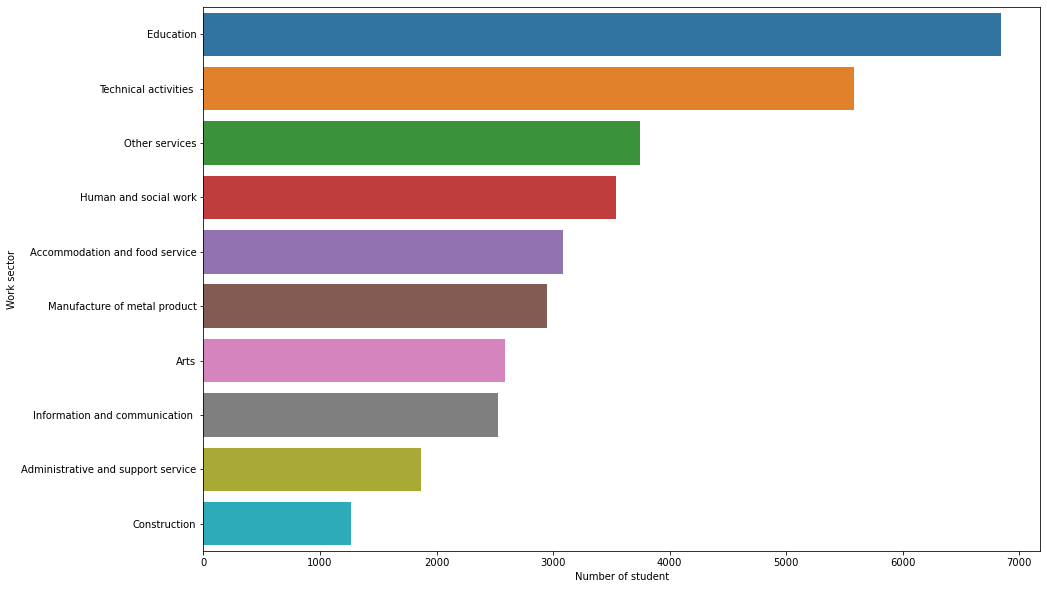

In [2072]:
# Plotting the data of top 10 sector

plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = '10'
top_10_work_sector.rename(columns={"index": "Work sector", "TYPEWORKSECTOR": "Number of student"},inplace=True)
sns.barplot(y=top_10_work_sector["Work sector"],x=top_10_work_sector["Number of student"])
plt.show()

#### Conclution: In top 10, a larger proportion of students joined the work place in education work sector, followed by those working in technical activities. Social activities sectors had more participants than those from technical activities sectors.

## 3.9 Analysing the connection between Enterprise size, Work sector and Placement grant

In [2073]:
# Aggregate data, based on the size, work sector and calculate placement grant

grouped=df[['enterprise_size','TYPEWORKSECTOR','PLACEMENTGRANT']].groupby(['enterprise_size','TYPEWORKSECTOR']).mean()
grouped

PLACEMENTGRANT
enterprise_size TYPEWORKSECTOR                
Large           A                  1534.451197
                B                  1753.158696
                C                  1818.062289
                D                  1903.158958
                E                  1377.842800
...                                        ...
Small           Q                  1416.419359
                R                  1446.948076
                S                  1429.112970
                T                  1148.362632
                U                  1562.208327

[63 rows x 1 columns]

In [2074]:
# Unstack the aggregated data for better analysis

grant_by_sector_and_size=grouped.unstack(0).fillna(0)
grant_by_sector_and_size

PLACEMENTGRANT                          
enterprise_size          Large       Medium        Small
TYPEWORKSECTOR                                          
A                  1534.451197  1403.312798  1300.524709
B                  1753.158696  1331.852941  1386.477273
C                  1818.062289  1425.936452  1322.546159
D                  1903.158958  1505.919404  1335.659051
E                  1377.842800  1797.110816  1483.733265
F                  1738.044331  1478.165660  1538.656340
G                  1963.210389  1428.304850  1235.850970
H                  1855.487758  1788.245625  1338.686080
I                  1510.197446  1439.762300  1270.707854
J                  2118.051338  1535.878561  1432.904399
K                  2024.015405  1672.047712  1572.003833
L                  1685.232143  1693.033750  1338.674833
M                  1845.069530  1640.383445  1575.081071
N                  1700.388145  1552.055275  1492.714240
O                  1588.818487  1433.535405  1532.984395
P                  1687.596509  2102.091550  1808.520607
Q                  1379.826399  1345.454448  1416.419359
R                  1693.280000  1532.277126  1446.948076
S                  1692.059201  1570.693549  1429.112970
T                  1180.000000   635.966875  1148.362632
U                  1737.556136  1554.948679  1562.208327

In [2075]:
# Analyzing this relationship in large enterprise sector with the top 5 sector that large enterprise offered work placement

large=pd.DataFrame(grouped.loc['Large'])
top_5_large_enterprise=large.sort_values(by='PLACEMENTGRANT',ascending=False)[:5]
top_5_large_enterprise

,PLACEMENTGRANT
TYPEWORKSECTOR,
J,2118.051338
K,2024.015405
G,1963.210389
D,1903.158958
H,1855.487758


In [2076]:
# create a dictionary of top 5 work sector:

dict_={"J":"Information and communication","K":"Financial and insurance activities",
                              "G":"Wholesale and retail trade",
                               "D":"Electricity supply","H":"Transporting and storage"}

# map the dictionary and the data

s = top_5_large_enterprise.index.to_series()
top_5_large_enterprise.index = np.array(s.map(dict_).fillna(s))
top_5_large_enterprise.reset_index(inplace=True)
top_5_large_enterprise.rename(columns={"index": "Work sector", "PLACEMENTGRANT": "Amount of placement grant"},inplace=True)
top_5_large_enterprise

,Work sector,Amount of placement grant
0,Information and communication,2118.051338
1,Financial and insurance activities,2024.015405
2,Wholesale and retail trade,1963.210389
3,Electricity supply,1903.158958
4,Transporting and storage,1855.487758


#### Conclusion: Large-sized companies who worked in information and communication sector and financial sector offered higher placement grant to students, compared to other sectors.

## 3.10 Analysing Number of ECTS credits for Placement 

### Number of ECTS credits for Placement anticipated 

- C29.1 Must be positive number
- C29.2 Between 0 and 90
- C29.3 Warning if >60
- C29.4 if " MobilityType " is not P, “Number of ECTS Credits Placement” = 0


In [2077]:
# Filter the data and create a data frame

credit_work=df.ECTSCREDITSWORK.value_counts().sort_values(ascending=False).nlargest(10)
credit_work_df=pd.DataFrame({"Number of credits":credit_work.index,
                            "Number of student":credit_work.values})
credit_work_df

,Number of credits,Number of student
0,0,13726
1,30,6633
2,15,2646
3,60,1893
4,20,1628
5,10,1372
6,18,1312
7,12,993
8,6,971
9,5,876


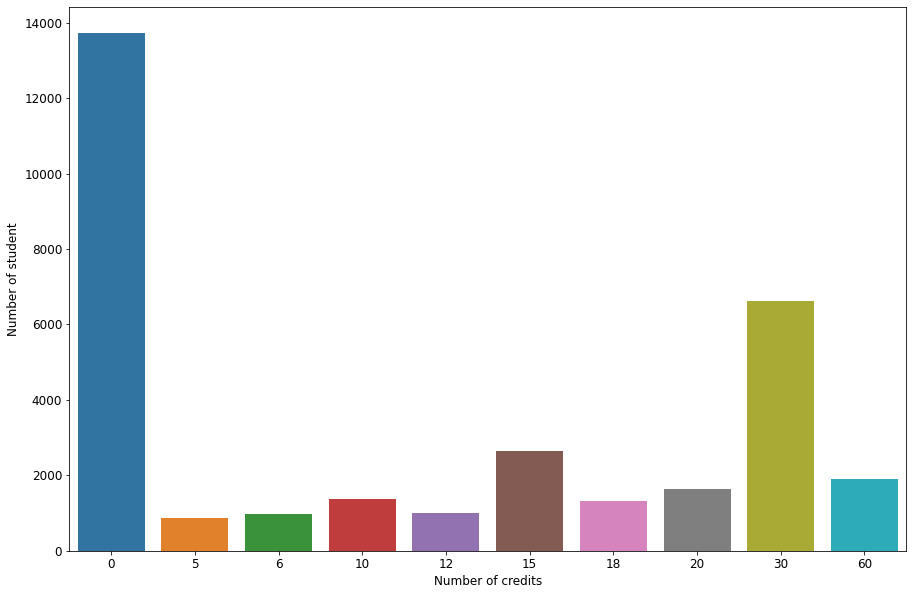

In [2078]:
# Plotting the data of credits earned

plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = '12'
sns.barplot(x=credit_work_df["Number of credits"],y=credit_work_df["Number of student"])
plt.show()

#### Conclusion: Because of the nature of work placement exchange, most of the students attended received no credits for their internship.

## 3.10 Analysing of workplacement language

### Learning carried out in the national language of Host country
##### Db: TaughtHostLang
- Whether the student has carried out the training in the language of the Host Country

In [2079]:
# Filter the data

taught_host_lang=pd.DataFrame(df.TAUGHTHOSTLANG.value_counts(normalize=True))
taught_host_lang

,TAUGHTHOSTLANG
Y,0.549053
N,0.450947


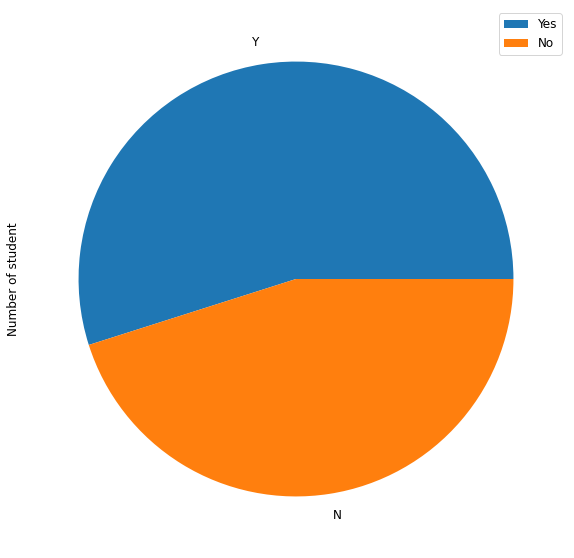

In [2080]:
# Plotting

taught_host_lang.rename(columns={"index": "Yes/No", "TAUGHTHOSTLANG": "Number of student"},inplace=True)
plot = taught_host_lang.plot.pie(y='Number of student', figsize=(10, 10)).legend(["Yes","No"])
plt.rcParams['font.size'] = '12'
plt.show()

## 3.11 Analysing of Training Language

##### Db: LanguageTaught
- The language in which the student has  undergone the training

In [2081]:
# Filter the data

language_taught=df.LANGUAGETAUGHT.value_counts().nlargest(10)
language_taught

EN    20918
ES     4887
FR     4724
DE     4556
IT     1693
NL      565
PT      397
TR      274
PL      215
SV      193
Name: LANGUAGETAUGHT, dtype: int64

In [2082]:
# Top 10 languages that student has carried out in the same language of the Host Country

undergone_host_lang=df[new_data.TAUGHTHOSTLANG=='Y']
top_10_lang_training=undergone_host_lang['LANGUAGETAUGHT'].value_counts()[:10]
top_10_lang_training

EN    8253
ES    3366
DE    3312
FR    3207
IT    1234
NL     474
PT     320
TR     236
SV     177
CS     175
Name: LANGUAGETAUGHT, dtype: int64

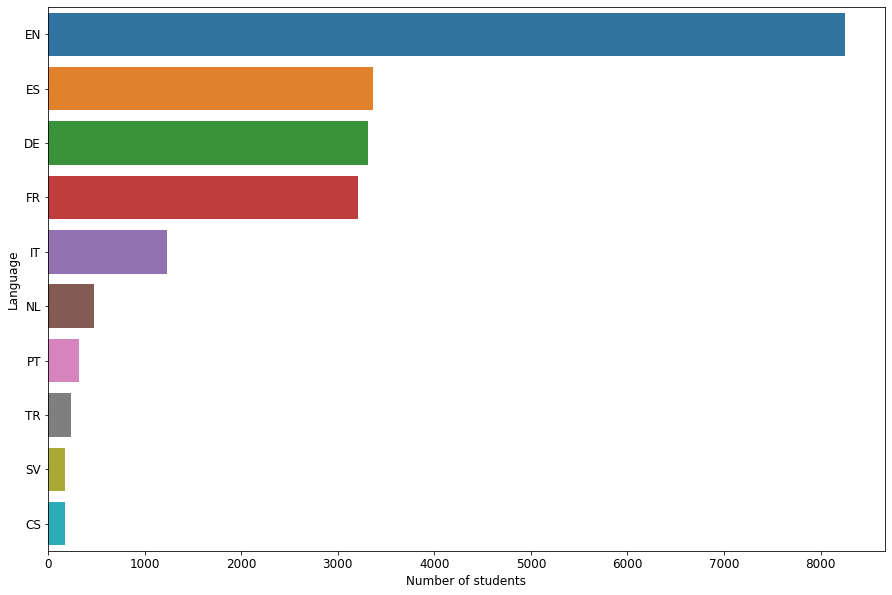

In [2083]:
# create a data frame and plot

plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = '12'
top_10_lang_training_df=pd.DataFrame({"Language":top_10_lang_training.index,
                            "Number of students":top_10_lang_training.values})
sns.barplot(y=top_10_lang_training_df["Language"],x=top_10_lang_training_df["Number of students"])
plt.show()

## 3.12 Analysing of  Language Preparation
##### Db: LingPreparation
- Reports whether a student has attended a language course including EILC 
course in the Host country or other courses in the Home or Host country
- String of 2 characters in the set (EC, HS, HM, NN)
 + EC = EILC 
 + HS = Host
 + HM = Home
 + NN = None


In [2084]:
# Filter the data and select top 10 lanaguage preparation
ling_preparation=df.LINGPREPARATION
ling_preparation.value_counts()
ling_preparation=df[df.LANGUAGETAUGHT!='NN']
top_10_ling_preparation=ling_preparation['LANGUAGETAUGHT'].value_counts()[:10]
top_10_ling_preparation

EN    20918
ES     4887
FR     4724
DE     4556
IT     1693
NL      565
PT      397
TR      274
PL      215
SV      193
Name: LANGUAGETAUGHT, dtype: int64

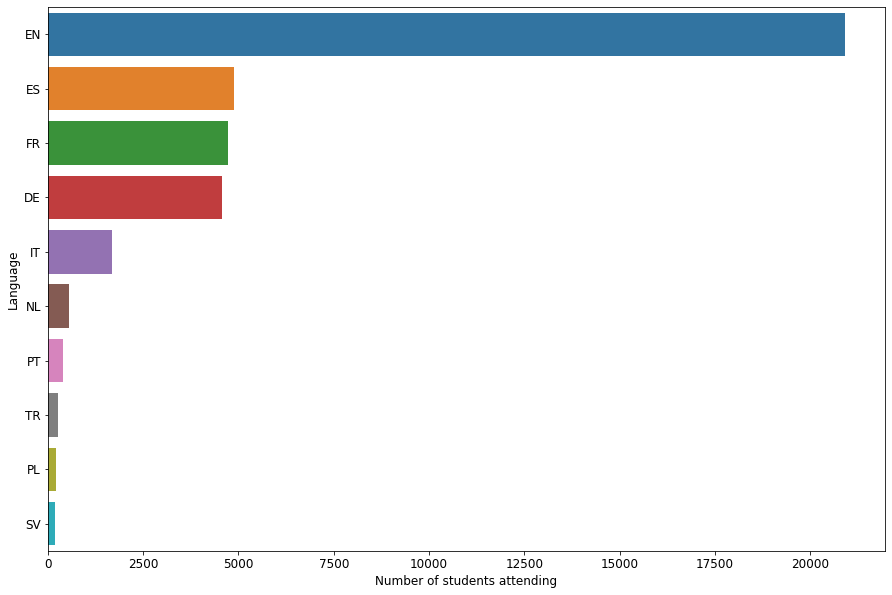

In [2085]:
# create a data frame and plotting

top_10_ling_preparation_df=pd.DataFrame({"Language":top_10_ling_preparation.index,
                            "Number of students attending":top_10_ling_preparation.values})

plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = '12'
sns.barplot(y=top_10_ling_preparation_df["Language"],x=top_10_ling_preparation_df["Number of students attending"])
plt.show()

#### Conclusion:Students who attended the workplacement with the language of English, Spanish, French and German usually have to attend language training courses before the workplacement.

## 3.13 Analysing of  Previous participation in the ERASMUS programme
###### Db: PreviousParticipation
- The field indicates whether the student has received an ERASMUS grant prior to this one and for which type of mobility. 
    + N = No
    + S = Study
    + P = Placement
    + M = Erasmus Mundus


In [2086]:
# Calculate value counts of previous participation in Erasmus

df.PREVIOUSPARTICIPATION.value_counts(normalize = True)

N    0.858158
S    0.140986
M    0.000428
P    0.000428
Name: PREVIOUSPARTICIPATION, dtype: float64

In [2087]:
# Aggregate the data based on previous participation and calculate placement grant

part_grant_agg = df[["PREVIOUSPARTICIPATION","PLACEMENTGRANT"]].groupby("PREVIOUSPARTICIPATION").mean()
part_grant_agg

,PLACEMENTGRANT
PREVIOUSPARTICIPATION,
M,1893.955882
N,1585.701253
P,1679.039412
S,1608.704752


#### Conclusion: Erasmus Mundus students received higher grant that other students. If the students did not join Erasmus exchange before, they are less likely to receive placement grant.

## 3.14 Analysing of Qualification received at the Host Country

### Qualification received at the Host Country
##### Db: QualificationAtHost
- The field will hold information on whether the student will get a double, joint degree or any other qualification at the Host Institution/ Placement or no.
    + D = Double
    + J  = Joint
    + O = Other
    + N = None (Europass etc.)


In [2088]:
# Filter the data and create a data frame

qualification_at_host=pd.DataFrame(df.QUALIFICATIONATHOST.value_counts())
qualification_at_host.reset_index(inplace=True)
qualification_at_host

,index,QUALIFICATIONATHOST
0,N,38566
1,O,868
2,J,202
3,D,56


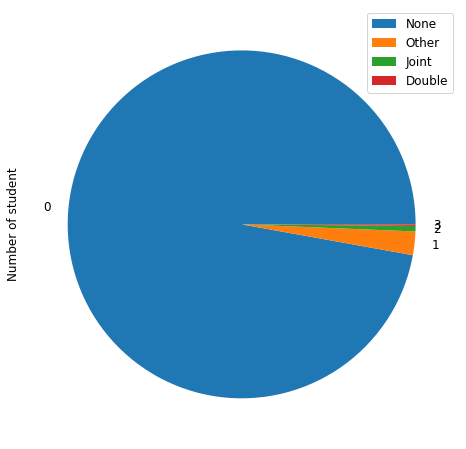

In [2089]:
# Plotting

qualification_at_host.reset_index()
qualification_at_host.rename(columns={"index": "Qualification", "QUALIFICATIONATHOST": "Number of student"},inplace=True)

plt.rcParams['font.size'] = '12'
labels = ["None","Other","Joint","Double"]
qualification_at_host.plot.pie(y="Number of student", figsize=(8, 8)).legend(["None","Other","Joint","Double"])
plt.show()

#### Conclusion: The majority of students received no qualifications. Only a small proportion of them got Double, Joint or Other qualifications

## Conclusion for the dataset of exchange student with work placement:
### Quantitative data:
#### •	Placement grant has a strong positive correlation with the length of work placement and a weak positive correlation with ECTS credit earned from work placement.
#### •	ECTS Credits earned from work placement have a weak correlation with length of placement.
#### •	Years of HE studey prior to Erasmus placement have a weak positive correlation with age

###  Qualitative data:
#### • Gender: Female students were more likely to engage in work placement exchange, but they received a bit less than male counterparts.
#### • Nationality: people from the west of European were more likely to join work placement exchange (e.g: France, Germany, Spain, UK, Italy). However, they were not the ones that received higher workplacement grants. People from Mediterranean sea and North sea area like Cyprus, Greece UK, Ireland, Iceland were among those who received the higher grants.
#### • Subject: Those with social and business backgrounds are more engaging in work placement exchange than those from science and technology background.
#### • Work placement grants: Large-sized businesses tend to pay more in work placement than medium- and small-sized businesses. And those in sectors of information, communication, and financial sectors offered higher placement grant to students, compared to other sectors.
#### • Credit received and qualifications: The majority of students received no credits from their work placement and this is compatible with the fact that most of the exchange students received no qualification from this exchange.
#### • Language usage and language preparation: even though the majority of students did not have to undergo language preparation course prior the exchange, they used the same language with that of the host countries.


## Machine Learning 

### Prediction with one feature

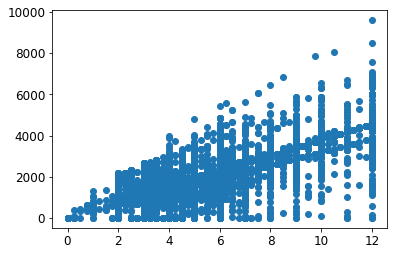

In [2090]:
plt.scatter(df['LENGTHPLACEMENT'], df['PLACEMENTGRANT'])
plt.show()

In [2091]:
X = df[['LENGTHPLACEMENT']]
y = df['PLACEMENTGRANT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31753, 1), (7939, 1), (31753,), (7939,))

In [2092]:
lr = LinearRegression()
lr.fit(X_train , y_train)
train_score = lr.score(X_train , y_train)
train_score

0.6392665324525135

In [2093]:
print(lr.coef_)
print(lr.intercept_)

[332.00792158]
145.05303821386656


In [2094]:
y_pred = lr.predict(X_test)

In [2095]:
# mean_squared_error(y_test , y_pred , squared=True)
test_score = r2_score(y_test , y_pred)
test_score

0.6493759705970441

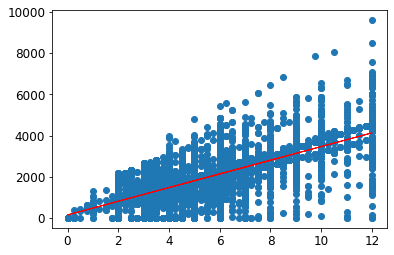

In [2096]:
plt.scatter(df['LENGTHPLACEMENT'], df['PLACEMENTGRANT'])
plt.plot(X_test, y_pred, color="red", linewidth=1)
plt.show()

### Prediction with all features

In [2097]:
binary_cols  = ['GENDER', 'MOBILITYTYPE', 'TAUGHTHOSTLANG']
ordinal_cols = ['ENTERPRISESIZE']
nominal_cols = ['PREVIOUSPARTICIPATION', 'QUALIFICATIONATHOST', 'SUBJECTAREA', 'NATIONALITY', 'LEVELSTUDY', 
                'COUNTRYOFWORKPLACEMENT', 'TYPEWORKSECTOR', 'LINGPREPARATION', 'LANGUAGETAUGHT']
numeric_cols = ['AGE', 'YEARSPRIOR', 'LENGTHPLACEMENT', 'ECTSCREDITSWORK']

### Binary features

In [2098]:
df['GENDER'].value_counts()

F    24396
M    15296
Name: GENDER, dtype: int64

In [2099]:
df['GENDER'] = df['GENDER'].map({'F':0, 'M':1})

In [2100]:
df['SEVSUPPLEMENT'].value_counts()

0       39665
100         3
966         2
200         2
3520        1
3616        1
861         1
1500        1
1368        1
756         1
913         1
400         1
879         1
1902        1
492         1
1960        1
448         1
8708        1
550         1
4004        1
1188        1
97          1
1059        1
702         1
Name: SEVSUPPLEMENT, dtype: int64

In [2101]:
df['MOBILITYTYPE'].value_counts()

P    39642
C       50
Name: MOBILITYTYPE, dtype: int64

In [2102]:
df['MOBILITYTYPE'] = student_with_workplacement['MOBILITYTYPE'].map({'P':0, 'C':1})

In [2103]:
df['TAUGHTHOSTLANG'].value_counts()

Y    21793
N    17899
Name: TAUGHTHOSTLANG, dtype: int64

In [2104]:
df['TAUGHTHOSTLANG'] = df['TAUGHTHOSTLANG'].map({'Y':1, 'N':0})

### Ordinal features

In [2105]:
df['ENTERPRISESIZE'].value_counts()

S    16622
M    13255
L     9815
Name: ENTERPRISESIZE, dtype: int64

In [2106]:
dic = {'S':0,'M':1,'L':2}

In [2107]:
df['ENTERPRISESIZE'] = df['ENTERPRISESIZE'].replace(dic)

### Nominal Features


In [2108]:
df['PREVIOUSPARTICIPATION'].value_counts()

N    34062
S     5596
M       17
P       17
Name: PREVIOUSPARTICIPATION, dtype: int64

In [2109]:
df_PP = pd.get_dummies(df['PREVIOUSPARTICIPATION'], prefix='previous_paticipation')
df_PP.head()

,previous_paticipation_M,previous_paticipation_N,previous_paticipation_P,previous_paticipation_S
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [2110]:
df['QUALIFICATIONATHOST'].value_counts()

N    38566
O      868
J      202
D       56
Name: QUALIFICATIONATHOST, dtype: int64

In [2111]:
df_QAH = pd.get_dummies(df['QUALIFICATIONATHOST'], prefix='qualification_at_host')
df_QAH.head()

,qualification_at_host_D,qualification_at_host_J,qualification_at_host_N,qualification_at_host_O
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [2112]:
df['SUBJECTAREA'].value_counts()

64     5355
222    3851
340    1904
34     1773
345    1254
       ... 
853       2
814       2
869       1
9         1
544       1
Name: SUBJECTAREA, Length: 139, dtype: int64

In [2113]:
df_SA = pd.get_dummies(df['SUBJECTAREA'], prefix='subject_area')
df_SA.head()

,subject_area_0,subject_area_1,subject_area_2,subject_area_3,subject_area_4,subject_area_5,subject_area_6,subject_area_7,subject_area_8,subject_area_9,...,subject_area_840,subject_area_850,subject_area_851,subject_area_852,subject_area_853,subject_area_859,subject_area_860,subject_area_861,subject_area_862,subject_area_869
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2114]:
df['NATIONALITY'].value_counts()

FR    5793
DE    5396
ES    4456
UK    3664
PL    2541
IT    2267
NL    2165
TR    1130
BE    1101
RO    1080
FI    1030
XX     881
PT     871
HU     849
LT     818
CZ     805
AT     799
IE     584
LV     550
GR     549
SK     475
BG     461
DK     434
SE     283
SI     267
EE     207
NO     129
CY      55
IS      29
LU      18
LI       5
Name: NATIONALITY, dtype: int64

In [2115]:
df_NA = pd.get_dummies(df['NATIONALITY'], prefix='nationality')
df_NA.head()

,nationality_AT,nationality_BE,nationality_BG,nationality_CY,nationality_CZ,nationality_DE,nationality_DK,nationality_EE,nationality_ES,nationality_FI,...,nationality_NO,nationality_PL,nationality_PT,nationality_RO,nationality_SE,nationality_SI,nationality_SK,nationality_TR,nationality_UK,nationality_XX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2116]:
df['LEVELSTUDY'].value_counts()

1    16611
S     7760
2     6920
1     5548
2     1894
3      606
3      353
Name: LEVELSTUDY, dtype: int64

In [2117]:
df_LS = pd.get_dummies(df['LEVELSTUDY'], prefix='level_study')
df_LS.head()

,level_study_1,level_study_2,level_study_3,level_study_1,level_study_2,level_study_3,level_study_S
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [2118]:
df['COUNTRYOFWORKPLACEMENT'].value_counts()

UK      6823
ES      6564
DE      5488
FR      4426
IT      2364
BE      1858
NL      1538
IE      1250
PT       917
AT       903
SE       824
GR       768
PL       631
CZ       570
DK       501
MT       499
NO       489
TR       489
FI       486
HU       361
LU       315
RO       309
BG       274
LT       207
CY       187
SK       178
SI       146
EE       115
LV       105
IS        79
LI        20
CH         5
HR         2
BENL       1
Name: COUNTRYOFWORKPLACEMENT, dtype: int64

In [2119]:
df_COW = pd.get_dummies(df['COUNTRYOFWORKPLACEMENT'], prefix='country_of_workplacement')
df_COW.head()

,country_of_workplacement_AT,country_of_workplacement_BE,country_of_workplacement_BENL,country_of_workplacement_BG,country_of_workplacement_CH,country_of_workplacement_CY,country_of_workplacement_CZ,country_of_workplacement_DE,country_of_workplacement_DK,country_of_workplacement_EE,...,country_of_workplacement_NL,country_of_workplacement_NO,country_of_workplacement_PL,country_of_workplacement_PT,country_of_workplacement_RO,country_of_workplacement_SE,country_of_workplacement_SI,country_of_workplacement_SK,country_of_workplacement_TR,country_of_workplacement_UK
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2120]:
df['TYPEWORKSECTOR'].value_counts()

P    6840
M    5583
S    3744
Q    3536
I    3087
C    2947
R    2586
J    2528
N    1866
F    1270
A    1052
K    1012
G     949
H     783
O     552
D     432
U     348
L     277
E     123
T      98
B      79
Name: TYPEWORKSECTOR, dtype: int64

In [2121]:
df_TWS = pd.get_dummies(df['TYPEWORKSECTOR'], prefix='type_work_sector')
df_TWS.head()

,type_work_sector_A,type_work_sector_B,type_work_sector_C,type_work_sector_D,type_work_sector_E,type_work_sector_F,type_work_sector_G,type_work_sector_H,type_work_sector_I,type_work_sector_J,...,type_work_sector_L,type_work_sector_M,type_work_sector_N,type_work_sector_O,type_work_sector_P,type_work_sector_Q,type_work_sector_R,type_work_sector_S,type_work_sector_T,type_work_sector_U
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2122]:
df['LINGPREPARATION'].value_counts()

NN    29171
HM     8664
HS     1776
EC       81
Name: LINGPREPARATION, dtype: int64

In [2123]:
df_LP = pd.get_dummies(df['LINGPREPARATION'], prefix='ling_preparation')
df_LP.head()

,ling_preparation_EC,ling_preparation_HM,ling_preparation_HS,ling_preparation_NN
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [2124]:
df['LANGUAGETAUGHT'].value_counts()

EN    20918
ES     4887
FR     4724
DE     4556
IT     1693
NL      565
PT      397
TR      274
PL      215
SV      193
CS      186
NO      156
EL      130
HU      127
BG      102
DA       98
SK       94
FI       89
RO       78
XX       54
LT       48
LV       30
SL       26
ET       17
IS       16
MT       10
GA        9
Name: LANGUAGETAUGHT, dtype: int64

In [2125]:
df_LT = pd.get_dummies(df['LANGUAGETAUGHT'], prefix='language_taught')
df_LT.head()

,language_taught_BG,language_taught_CS,language_taught_DA,language_taught_DE,language_taught_EL,language_taught_EN,language_taught_ES,language_taught_ET,language_taught_FI,language_taught_FR,...,language_taught_NL,language_taught_NO,language_taught_PL,language_taught_PT,language_taught_RO,language_taught_SK,language_taught_SL,language_taught_SV,language_taught_TR,language_taught_XX
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2126]:
df2 = pd.concat([df, df_PP, df_QAH, df_SA, df_NA, df_LS, df_COW, df_TWS, df_LP, df_LT], axis=1)

In [2127]:
df2.columns

Index(['HOMEINSTITUTION', 'COUNTRYCODEOFHOMEINSTITUTION', 'AGE', 'GENDER',
       'NATIONALITY', 'SUBJECTAREA', 'LEVELSTUDY', 'YEARSPRIOR',
       'MOBILITYTYPE', 'HOSTINSTITUTION',
       ...
       'language_taught_NL', 'language_taught_NO', 'language_taught_PL',
       'language_taught_PT', 'language_taught_RO', 'language_taught_SK',
       'language_taught_SL', 'language_taught_SV', 'language_taught_TR',
       'language_taught_XX'],
      dtype='object', length=300)

In [2128]:
# Drop

df2 = df2.drop(['HOMEINSTITUTION', 'HOSTINSTITUTION', 'COUNTRYCODEOFHOMEINSTITUTION', 
       'NATIONALITY', 'LEVELSTUDY', 'COUNTRYOFWORKPLACEMENT',
       'TYPEWORKSECTOR', 'SHORTDURATION',
       'PLACEMENTSTARTDATE', 'CONSORTIUMAGREEMENTNUMBER',
       'TOTALECTSCREDITS', 'LANGUAGETAUGHT',
       'LINGPREPARATION', 'WORKPLACEMENT', 'SEVSUPPLEMENT', 'PREVIOUSPARTICIPATION', 'QUALIFICATIONATHOST',
        'enterprise_size'], axis = 1)

In [2129]:
y = df2['PLACEMENTGRANT']
X = df2.drop('PLACEMENTGRANT', axis=1)


In [2130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31753, 281), (7939, 281), (31753,), (7939,))

In [2131]:
lr = LinearRegression()
lr.fit(X_train , y_train)
train_score = lr.score(X_train , y_train)
train_score

0.7912191048440662

In [2132]:
print(lr.coef_)
print(lr.intercept_)

[-5.20278395e-02 -7.87311179e+00  3.12055463e-02 -1.44831020e+01
 -6.03003818e+02 -2.41845630e+01  3.40811808e+02 -1.62851378e+00
  4.90853644e+00  7.45349661e-02 -1.44687017e+01 -2.75557796e+01
  6.91588755e+01 -2.71343942e+01  1.69358272e+02 -1.00664923e+02
 -7.16101332e+00 -6.15323354e+01  4.81508217e+01 -8.08298504e+00
  4.99184651e+01 -5.59604921e+00 -8.33645432e+01  6.51353778e+01
  2.33657040e+01  1.50127900e+02 -2.21281842e+02 -8.61842219e+02
  5.03992008e+00  4.05392936e+01  3.79046747e+01  1.26929960e+01
 -5.01805314e+01  1.23901366e+02  2.46420653e+00  6.64167102e+01
 -1.59227099e+00  4.15337695e+00 -2.08452164e+01  1.76999511e+02
 -1.05786558e+02  1.13067387e+02  2.43450684e+01  5.81246737e+01
  5.47196266e+01  9.89829580e+01 -3.53979748e+01  1.11116350e+01
 -7.21289294e+01 -1.18542435e+02 -2.75886861e+02  3.09600278e+01
 -1.91336327e+02 -2.96939562e+01  9.32560421e+01 -3.04275440e+01
  4.21532108e+01  3.65077417e+00 -1.07635290e+02 -2.68675888e+01
  2.05065193e+01  9.02679

In [2133]:
y_pred = lr.predict(X_test)
test_score = r2_score(y_test , y_pred)
test_score

0.7930385884923736